In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm

In [3]:
np.random.seed(42)
vals1 = np.random.randn(10000) * np.random.randint(30, 80) + np.random.randint(100, 300)
vals2 = np.random.randn(2500) * np.random.randint(40, 100) + np.random.randint(350, 400)
vals3 = np.random.randn(2500) * np.random.randint(40, 100) + np.random.randint(450, 600)
vals4 = np.random.randn(2500) * np.random.randint(40, 100) + np.random.randint(700, 800)
vals5 = np.random.rand(10000) * 1000

vals = np.concatenate([vals1, vals2, vals3, vals4])
np.random.shuffle(vals)

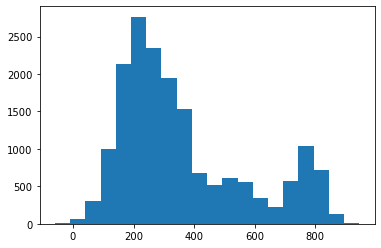

In [4]:
plt.hist(vals, bins=20)
plt.show()

In [5]:
df_vals = pd.DataFrame({
    "vals": vals
})

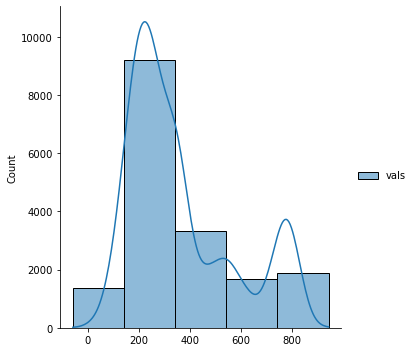

In [6]:
sns.displot(df_vals, kde=True, bins=5)
plt.show()

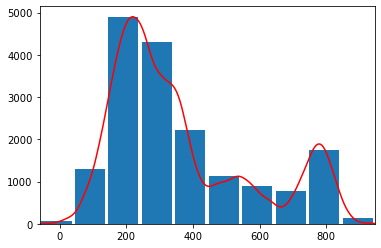

In [7]:
def make_kde(vals, bins=20, kde_bins=200):
    max_v = vals.max()
    min_v = vals.min()
    diff = max_v - min_v
    kde_bin_values = np.linspace(min_v, max_v, kde_bins + 1)
    kde_bin_min_max = list(zip(kde_bin_values[:-1], kde_bin_values[1:]))
    vals_in_kde_bins = [[] for _ in range(kde_bins)]
    for v in vals:
        for i, (min_b, max_b) in enumerate(kde_bin_min_max):
            if min_b <= v <= max_b:
                vals_in_kde_bins[i].append(v)
                break

    kde_bin_heights = [len(b) for b in vals_in_kde_bins]
    kde_b_sum = sum(kde_bin_heights)
    kde_bin_weights = [b / kde_b_sum * len(vals) for b in kde_bin_heights]

    kde_bin_means = [(a + b) / 2 for (a, b) in kde_bin_min_max]
    std = diff ** 2 / (4 * len(vals))
    t = np.linspace(min_v - 0.02 * diff, max_v + 0.02 * diff, 200)
    normals = [b_w * norm.pdf(t, loc=b_m, scale=std) for (b_w, b_m) in zip(kde_bin_weights, kde_bin_means)]
    sum_t_normals = np.array([sum([n[i] for n in normals]) for i in range(len(t))])


    bin_values = np.linspace(min_v, max_v, bins + 1)
    bin_min_max = list(zip(bin_values[:-1], bin_values[1:]))
    vals_in_bins = [[] for _ in range(bins)]
    for v in vals:
        for i, (min_b, max_b) in enumerate(bin_min_max):
            if min_b <= v <= max_b:
                vals_in_bins[i].append(v)
                break

    bin_heights = [len(b) for b in vals_in_bins]
    bin_means = [(a + b) / 2 for (a, b) in bin_min_max]

    max_height = max(bin_heights)
    max_sum_t_normals = max(sum_t_normals)
    scaler = max_height / max_sum_t_normals
    kde = scaler * sum_t_normals
    plt.plot(t, kde, color="red")
    width = 0.9 * (diff / bins)
    plt.bar(bin_means, bin_heights, width=width)
    plt.xlim((min_v, max_v))


make_kde(df_vals["vals"], bins=10, kde_bins=200)